<a href="https://colab.research.google.com/github/kinglider/Machine-Learning-Adventures/blob/master/Tensorflow_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Image Classification**

#**Notebook Imports**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.datasets import mnist

Using TensorFlow backend.


#**Constants**

In [ ]:
type(mnist)

module

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#**Gather Data**

In [ ]:
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

#**Flatten And Reshape**

In [ ]:
x_train , x_test = x_train/255.0 , x_test/255.0

In [ ]:
x_train = x_train.reshape((60000,784))
x_test = x_test.reshape((10000,784))
#can use flatten method too

#**Define The Model**

In [ ]:
model = Sequential([
                    Dropout(rate=0.27, seed=35),
                    Dense(128,input_shape=(784,),activation='relu'),
                    Dense(64,activation='relu'),
                    Dense(16,activation='relu'),
                    Dense(10,activation='softmax')
])

#**Compile**

In [ ]:
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
type(model)

keras.engine.sequential.Sequential

#**FIt**

In [ ]:
model.fit(x_train,y_train,epochs=5,verbose=1,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 6s 116us/step - loss: 0.3952 - accuracy: 0.8822 - val_loss: 0.1885 - val_accuracy: 0.9473
Epoch 2/5
48000/48000 [==============================] - 5s 114us/step - loss: 0.1839 - accuracy: 0.9449 - val_loss: 0.1353 - val_accuracy: 0.9600
Epoch 3/5
48000/48000 [==============================] - 5s 114us/step - loss: 0.1444 - accuracy: 0.9566 - val_loss: 0.1129 - val_accuracy: 0.9673
Epoch 4/5
48000/48000 [==============================] - 5s 112us/step - loss: 0.1266 - accuracy: 0.9622 - val_loss: 0.1025 - val_accuracy: 0.9728
Epoch 5/5
48000/48000 [==============================] - 5s 113us/step - loss: 0.1146 - accuracy: 0.9662 - val_loss: 0.1124 - val_accuracy: 0.9710


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_3 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                170       
Total params: 109,946
Trainable params: 109,946
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test,verbose = 1)

10000/10000 [==============================] - 0s 30us/step


In [ ]:
print(f'Testing loss and accuracy {test_loss}, {test_acc}')

Testing loss and accuracy 0.10498598940335215, 0.9729999899864197


#**Making Predictions**

In [ ]:
prediction = model.predict(x_test, verbose=1)

10000/10000 [==============================] - 0s 25us/step


In [ ]:
prediction.shape

(10000, 10)

In [ ]:
prediction[0]

array([6.0951393e-14, 2.4517369e-08, 9.4644106e-09, 2.2581129e-07,
       4.3751639e-12, 8.0381959e-09, 6.9414750e-09, 9.9999976e-01,
       5.9236171e-12, 1.7711863e-11], dtype=float32)

In [ ]:
np.argmax(prediction[0])

7

In [ ]:
y_test[0]

7

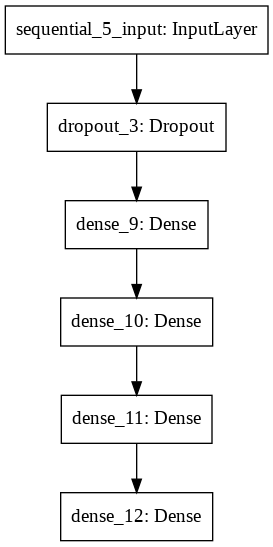

In [ ]:
keras.utils.plot_model(model, 'image_classification.png')